# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = r'C:\Users\lenovo1\Desktop\Machine learning project\dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)


# General Information About to the Dataset

In [3]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)


######################### Head #########################
      id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0  
#####

# Data cleaning

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the LabelEncoder
le = LabelEncoder()

# Converting the gender column
df['gender'] = le.fit_transform(df['gender'])

# Converting the Residence_type column into 0 and 1
df['Residence_type'] = le.fit_transform(df['Residence_type'])

# Converting the ever_married column into 0 and 1
df['ever_married'] = le.fit_transform(df['ever_married'])

# Converting the smoking_status column
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Dropping the work_type column
df = df.drop(['work_type'], axis=1)

# Initialize the IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer and transform the bmi column
df[['bmi']] = imputer.fit_transform(df[['bmi']])


In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,0,95.12,18.0,3,0
1,30468,1,58.0,1,0,1,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,1,110.89,17.6,3,0
3,56543,0,70.0,0,0,1,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,0,161.28,19.1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,0,10.0,0,0,0,1,58.64,20.4,1,0
43396,5450,0,56.0,0,0,1,1,213.61,55.4,0,0
43397,28375,0,82.0,1,0,1,1,91.94,28.9,0,0
43398,27973,1,40.0,0,0,1,1,99.16,33.2,1,0


# CHECKING IMBALANCE

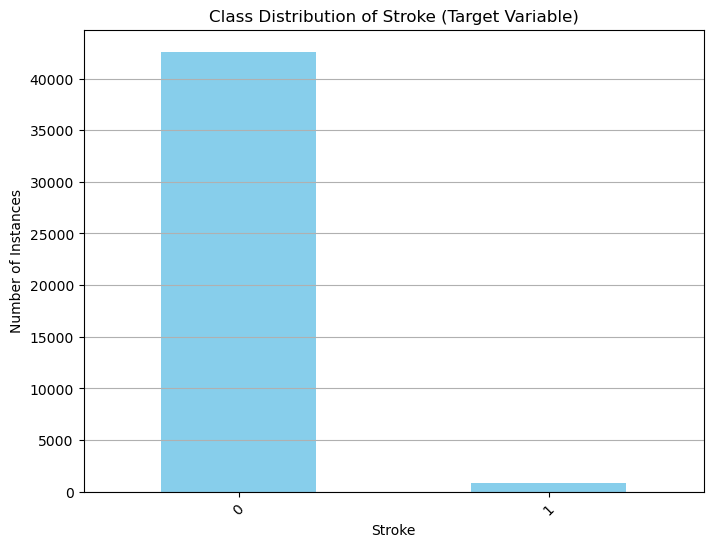

The target variable 'stroke' is imbalanced.


In [7]:
target_column = 'stroke'

# Count the occurrences of each class in the target variable
class_counts = df[target_column].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Stroke (Target Variable)')
plt.xlabel('Stroke')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Check if the target variable is imbalanced
# You can set a threshold for imbalance, for example, if one class is less than 5% of the total
threshold = 0.05
imbalance = any((class_counts / len(df)) < threshold)

if imbalance:
    print("The target variable 'stroke' is imbalanced.")
else:
    print("The target variable 'stroke' is not imbalanced.")

# Analysis of Categorical and Numerical Variables


In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

In [9]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")

Observations: 43400
Variables: 11
Cat_cols: 3
Num_cols: 4
Cat_but_car: 0


In [10]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [11]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

   hypertension     Ration
0         39339  90.642857
1          4061   9.357143
##########################################


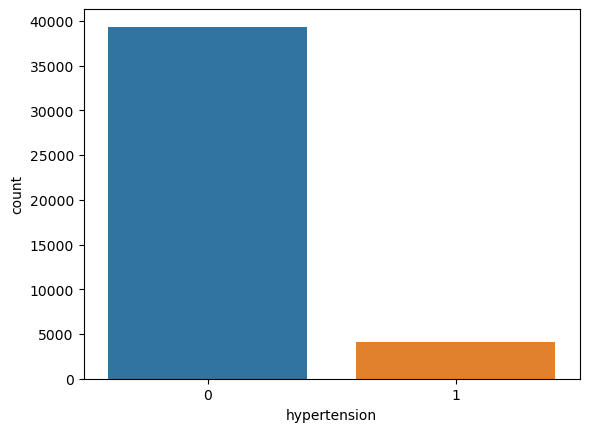

   heart_disease     Ration
0          41338  95.248848
1           2062   4.751152
##########################################


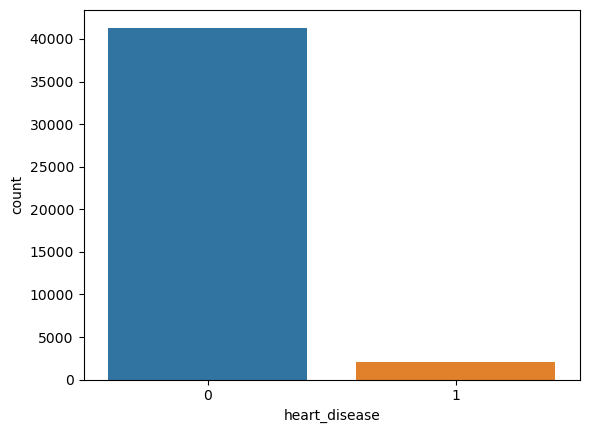

   stroke     Ration
0   42617  98.195853
1     783   1.804147
##########################################


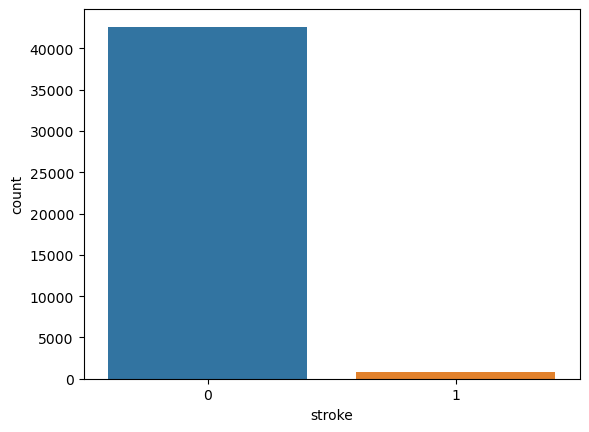

In [12]:
cat_summary_df(df)


In [13]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)
     

In [14]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count    43400.000000
mean     36326.142350
std      21072.134879
min          1.000000
1%         710.990000
5%        3557.800000
10%       7200.700000
20%      14386.800000
30%      21695.700000
40%      29017.600000
50%      36351.500000
60%      43648.800000
70%      50845.300000
80%      58178.000000
90%      65556.100000
95%      69296.050000
99%      72194.020000
max      72943.000000
Name: id, dtype: float64


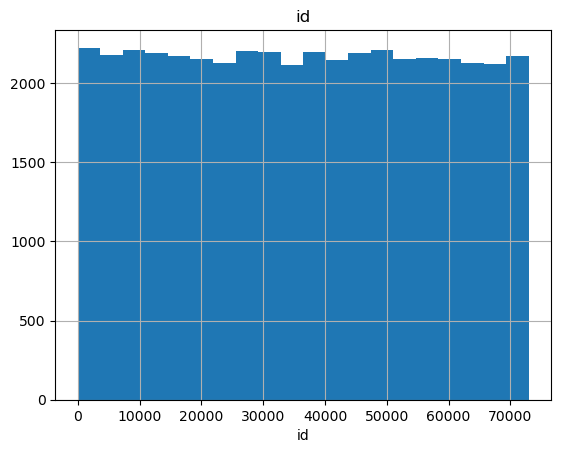

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
1%           0.800000
5%           4.000000
10%         10.000000
20%         20.000000
30%         28.000000
40%         36.000000
50%         44.000000
60%         50.000000
70%         57.000000
80%         64.000000
90%         73.000000
95%         78.000000
99%         82.000000
max         82.000000
Name: age, dtype: float64


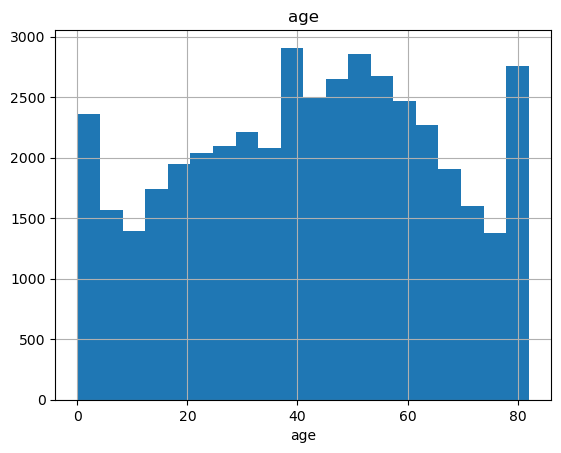

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
1%          56.300000
5%          61.200000
10%         66.180000
20%         74.350000
30%         80.370000
40%         85.626000
50%         91.580000
60%         98.240000
70%        106.370000
80%        120.290000
90%        180.952000
95%        212.041500
99%        239.190200
max        291.050000
Name: avg_glucose_level, dtype: float64


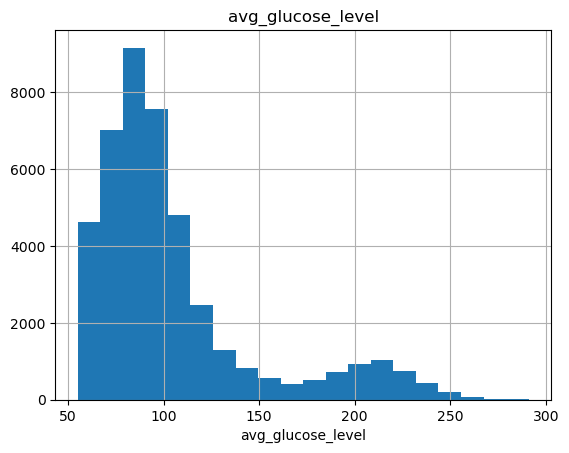

count    43400.000000
mean        28.605038
std          7.638023
min         10.100000
1%          15.100000
5%          17.500000
10%         19.500000
20%         22.300000
30%         24.400000
40%         26.300000
50%         28.100000
60%         29.400000
70%         31.400000
80%         34.100000
90%         38.400000
95%         42.400000
99%         51.600000
max         97.600000
Name: bmi, dtype: float64


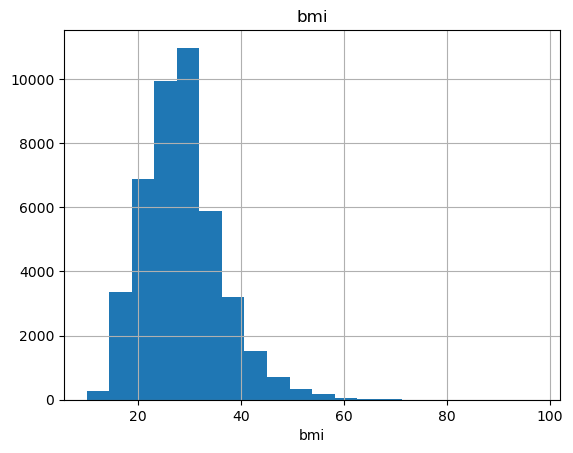

In [15]:
num_summary_df(df)


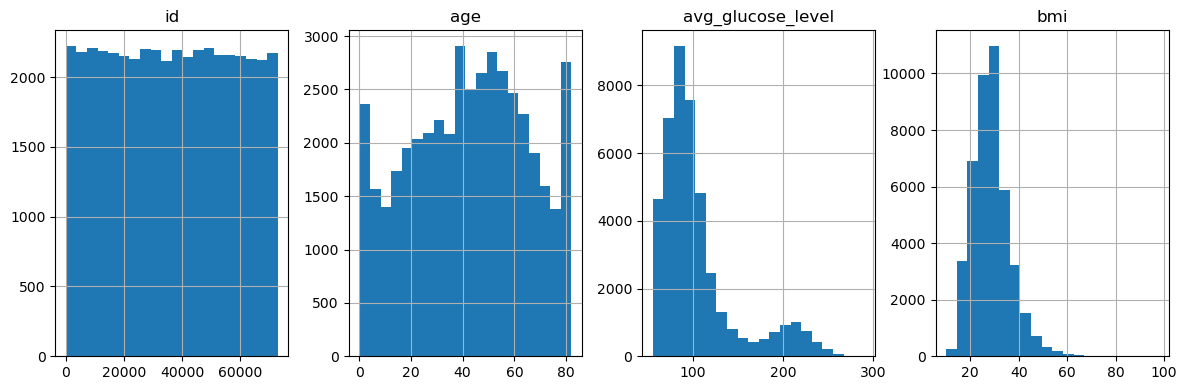

In [16]:
import matplotlib.pyplot as plt
import math

def plot_num_summary(dataframe):
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    
    # Determine the number of rows and columns needed
    num_plots = len(num_cols)
    num_cols_grid = 4  # Fixed number of columns in grid
    num_rows_grid = math.ceil(num_plots / num_cols_grid)  # Calculate required rows
    
    plt.figure(figsize=(12, 4 * num_rows_grid))  # Adjust figure height based on rows
    
    for index, col in enumerate(num_cols):
        plt.subplot(num_rows_grid, num_cols_grid, index + 1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

    plt.show()

# Example usage
plot_num_summary(df)


In [17]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}))
  print("#############################################")

In [18]:
def target_summary_with_num_df(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  for col in num_cols:
    target_summary_with_num(dataframe, target, col)

In [21]:
target_summary_with_num_df(df, "stroke")


                  id
stroke              
0       36317.641293
1       36788.836526
#############################################
              age
stroke           
0       41.741565
1       68.143448
#############################################
        avg_glucose_level
stroke                   
0              104.021590
1              129.582669
#############################################
              bmi
stroke           
0       28.585981
1       29.642280
#############################################


# Correlation Analysis

In [22]:
df.corr()


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.001657,0.012760,0.006571,0.009234,0.010217,0.000120,0.024634,0.018382,-0.014763,0.002976
gender,0.001657,1.000000,-0.027903,0.023709,0.082061,-0.031351,0.001508,0.035465,-0.021570,0.042775,0.011198
age,0.012760,-0.027903,1.000000,0.272169,0.250188,0.693070,0.001299,0.237627,0.352236,-0.379860,0.156049
hypertension,0.006571,0.023709,0.272169,1.000000,0.119777,0.176575,-0.003124,0.160211,0.153779,-0.118643,0.075332
heart_disease,0.009234,0.082061,0.250188,0.119777,1.000000,0.128833,-0.002743,0.146938,0.054133,-0.066340,0.113763
ever_married,0.010217,-0.031351,0.693070,0.176575,0.128833,1.000000,0.004422,0.153607,0.337517,-0.303543,0.071920
Residence_type,0.000120,0.001508,0.001299,-0.003124,-0.002743,0.004422,1.000000,0.000014,-0.003685,0.001532,0.002247
avg_glucose_level,0.024634,0.035465,0.237627,0.160211,0.146938,0.153607,0.000014,1.000000,0.184199,-0.096956,0.078917
bmi,0.018382,-0.021570,0.352236,0.153779,0.054133,0.337517,-0.003685,0.184199,1.000000,-0.249910,0.018407
smoking_status,-0.014763,0.042775,-0.379860,-0.118643,-0.066340,-0.303543,0.001532,-0.096956,-0.249910,1.000000,-0.041225


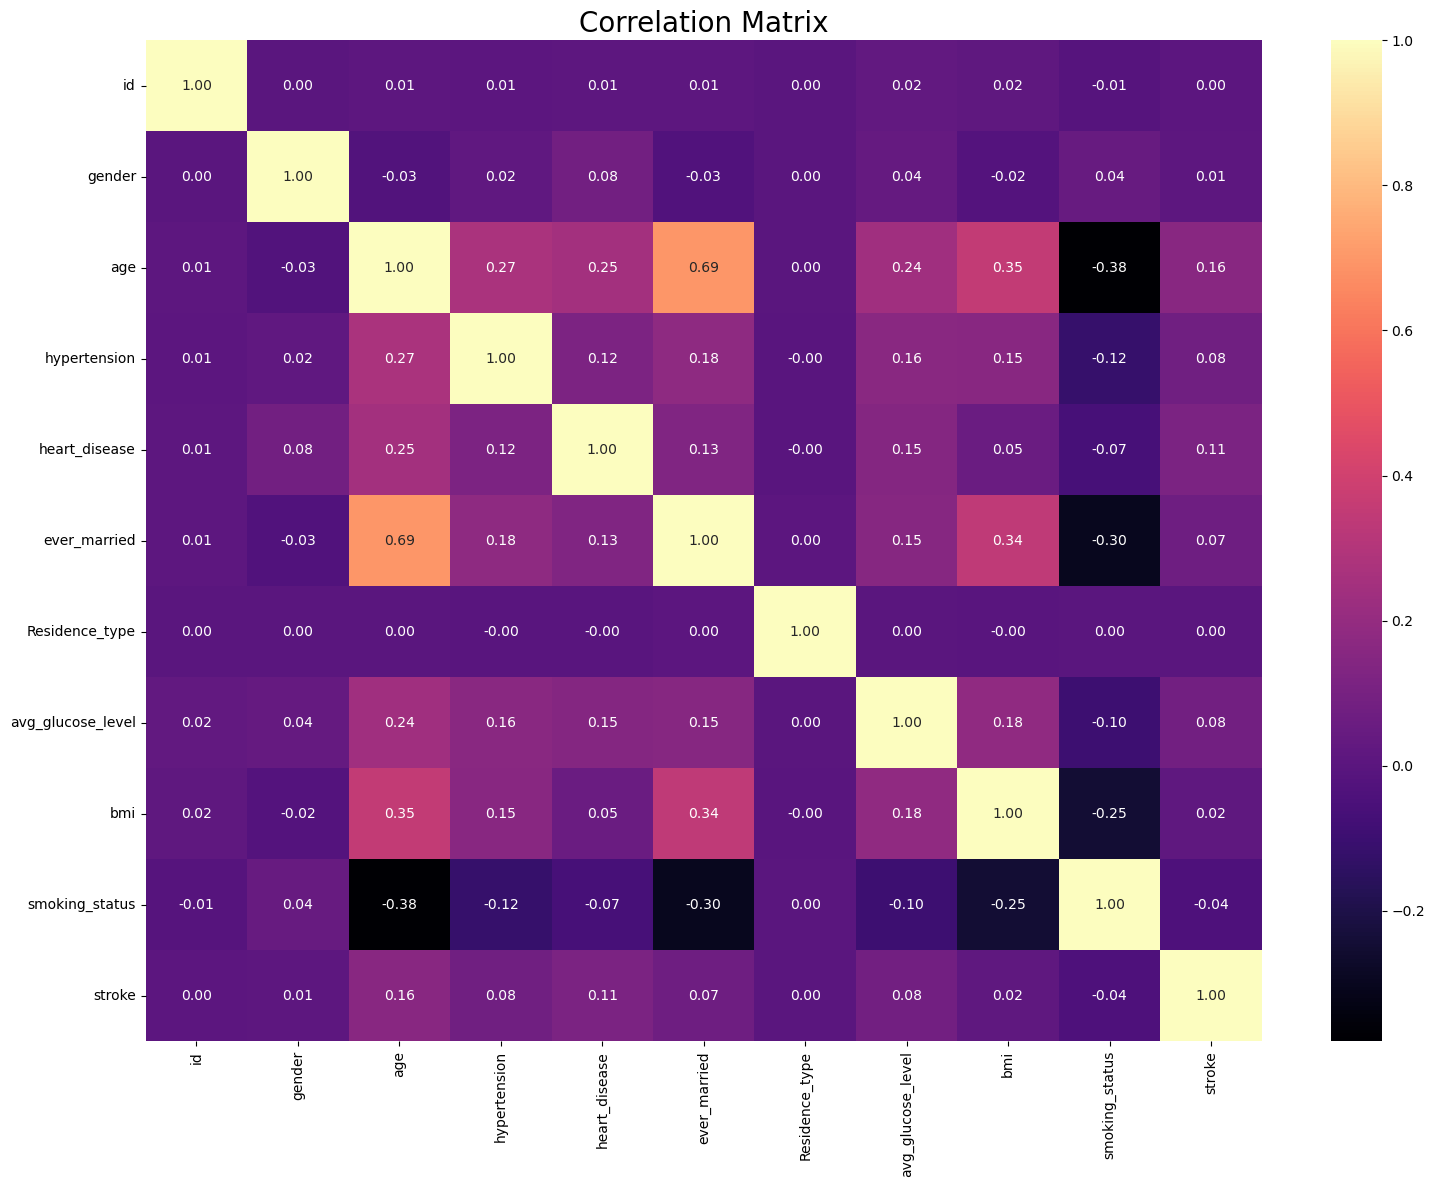

In [23]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [24]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

############## After Correlation Analysis, You Don't Need to Remove Variables ##############


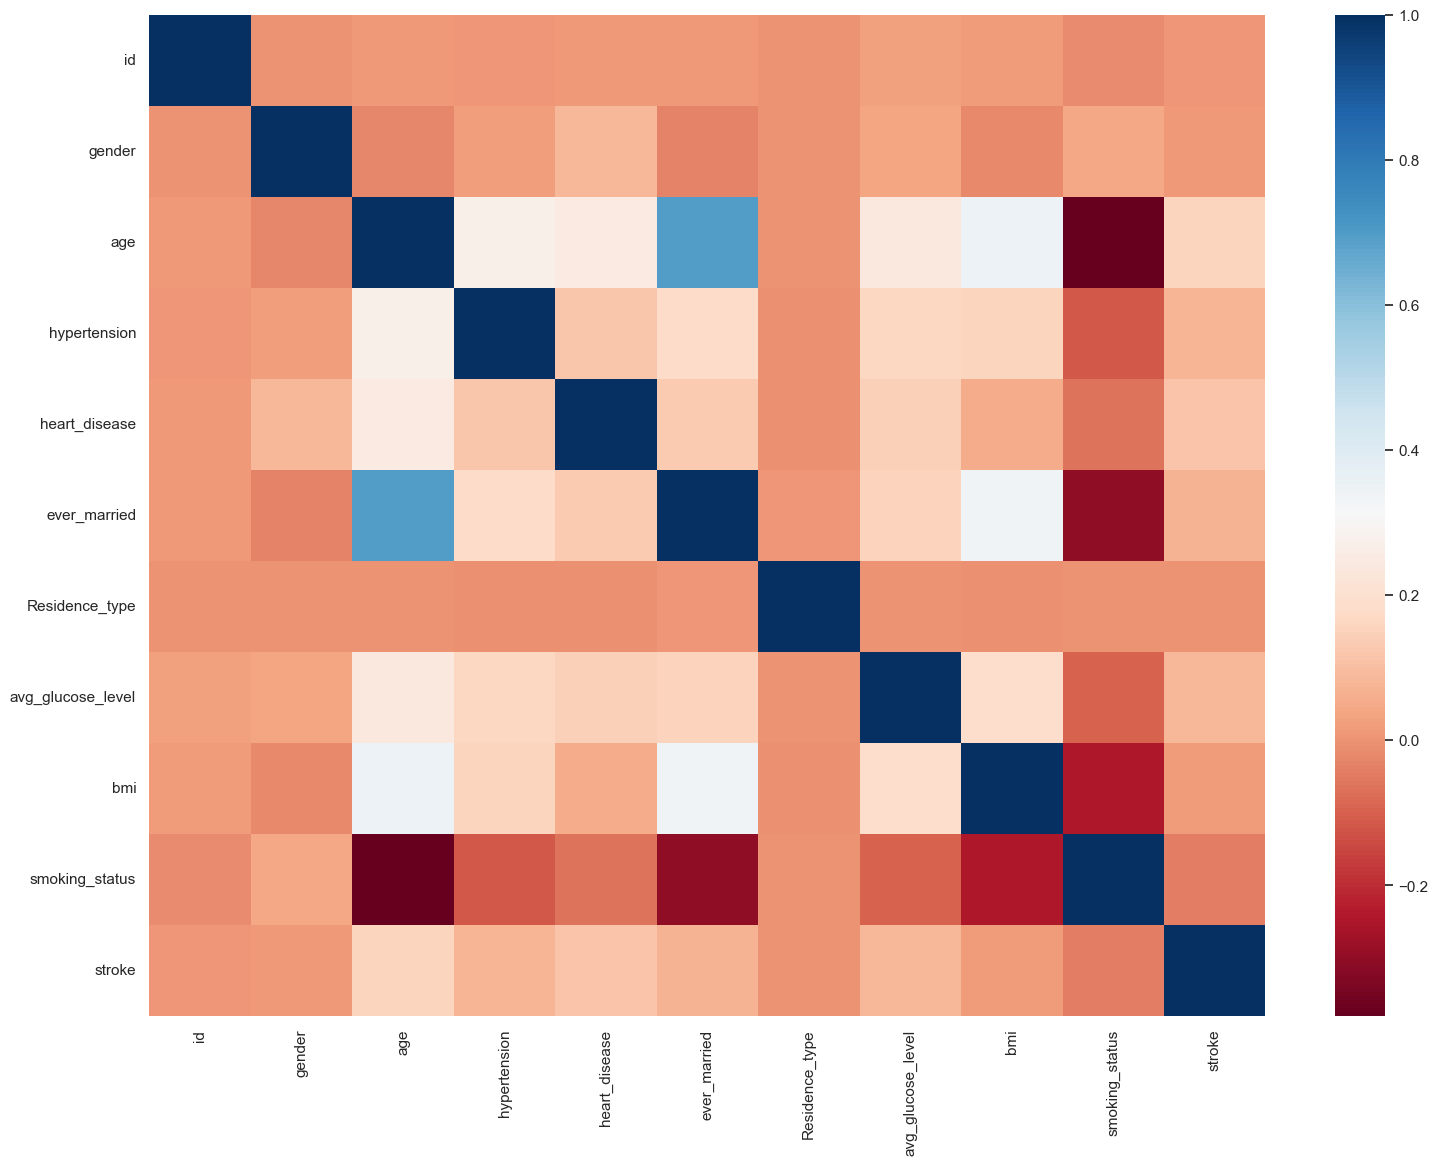

[]

In [25]:
high_correlated_cols(df, plot=True)


In [26]:
df.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Encoding and Scaling

In [27]:
def label_encoder(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [28]:
def label_encoder_dataframe(dataframe):
  binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in ["int", "float"] and dataframe[col].nunique() == 2]
  for col in binary_cols:
    label_encoder(dataframe, col)
     

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder_dataframe(df)

# Base Model

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score

def classification_algorithm(df, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        if c_report:
            print("Classification Report:")
            print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        if conf_matrix:
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(cm)
        
        # AUC and ROC Curve
        if roc_plot and y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage:
classification_algorithm(df, 'stroke')



Classifier: Logistic Regression
Accuracy: 0.9812
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8518
           1       0.00      0.00      0.00       162

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680

Confusion Matrix:
[[8517    1]
 [ 162    0]]
AUC: 0.6990
F1 Score (Positive): 0.0000
F1 Score (Negative): 0.9905

Classifier: Naive Bayes
Accuracy: 0.9627
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8518
           1       0.06      0.07      0.06       162

    accuracy                           0.96      8680
   macro avg       0.52      0.52      0.52      8680
weighted avg       0.97      0.96      0.96      8680

Confusion Matrix:
[[8345  173]
 [ 151   11]]
AUC: 0.8306
F1 Score (Positive): 0.0636
F1 Score (

# 1.Resampling Methods SMOTE TECHNIQUE

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd

def classification_algorithm_with_smote(df, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True):
    X = df.drop(target, axis=1)
    y = df[target]
    
    # Applying SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=123)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        if c_report:
            print("Classification Report:")
            print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        if conf_matrix:
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(cm)
        
        # AUC and ROC Curve
        if roc_plot and y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage with SMOTE applied:
classification_algorithm_with_smote(df, 'stroke')



Classifier: Logistic Regression
Accuracy: 0.7885
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      8525
           1       0.76      0.83      0.80      8522

    accuracy                           0.79     17047
   macro avg       0.79      0.79      0.79     17047
weighted avg       0.79      0.79      0.79     17047

Confusion Matrix:
[[6335 2190]
 [1415 7107]]
AUC: 0.8604
F1 Score (Positive): 0.7977
F1 Score (Negative): 0.7785

Classifier: Naive Bayes
Accuracy: 0.8031
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      8525
           1       0.75      0.91      0.82      8522

    accuracy                           0.80     17047
   macro avg       0.82      0.80      0.80     17047
weighted avg       0.82      0.80      0.80     17047

Confusion Matrix:
[[5901 2624]
 [ 733 7789]]
AUC: 0.8728
F1 Score (Positive): 0.8227
F1 Score (

After applying SMOTE, there is a significant improvement in the detection of the minority class. Precision, recall, and F1 scores for class 1 have increased across all classifiers.
Accuracy has slightly decreased for some classifiers (e.g., Logistic Regression, Naive Bayes) because the models are now better at detecting both classes, leading to a more balanced performance.
he AUC values have improved after applying SMOTE, indicating better overall performance in distinguishing between the two classes.Random Forest and Decision Tree showed the highest accuracy and F1 scores for both classes after SMOTE, indicating their robustness in handling the imbalanced data.
KNN also showed strong performance with high F1 scores and AUC, making it a viable option.

# 2. Class Weighting Method

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score

def classification_algorithm(df, target, test_size=0.20, cv=10, results=True, conf_matrix=True, c_report=True, roc_plot=True, apply_class_weights=False):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)
    
    # Calculate class weights
    class_distribution = df[target].value_counts()
    total_samples = class_distribution.sum()
    class_weights = total_samples / (len(class_distribution) * class_distribution)
    class_weights = class_weights.to_dict()
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight=class_weights) if apply_class_weights else LogisticRegression(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(class_weight=class_weights) if apply_class_weights else DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(class_weight=class_weights) if apply_class_weights else RandomForestClassifier()
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        if c_report:
            print("Classification Report:")
            print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        if conf_matrix:
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(cm)
        
        # AUC and ROC Curve
        if roc_plot and y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage:
classification_algorithm(df, 'stroke', apply_class_weights=True)





Classifier: Logistic Regression
Accuracy: 0.7317
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      8518
           1       0.05      0.78      0.10       162

    accuracy                           0.73      8680
   macro avg       0.52      0.75      0.47      8680
weighted avg       0.98      0.73      0.83      8680

Confusion Matrix:
[[6225 2293]
 [  36  126]]
AUC: 0.8338
F1 Score (Positive): 0.0976
F1 Score (Negative): 0.8424

Classifier: Naive Bayes
Accuracy: 0.9627
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8518
           1       0.06      0.07      0.06       162

    accuracy                           0.96      8680
   macro avg       0.52      0.52      0.52      8680
weighted avg       0.97      0.96      0.96      8680

Confusion Matrix:
[[8345  173]
 [ 151   11]]
AUC: 0.8306
F1 Score (Positive): 0.0636
F1 Score (

Logistic Regression showed the most noticeable improvement after applying class weights, especially in recall for the minority class. This suggests that class weighting can help Logistic Regression better handle imbalanced datasets.
Naive Bayes, KNN, Decision Tree, and Random Forest did not show significant improvements with class weighting. This indicates that these models might require other methods like SMOTE or different tuning strategies to handle class imbalance effectively.
The overall decrease in accuracy for Logistic Regression after applying class weights is expected and acceptable because the model is making a better effort to balance the class predictions.
AUC improvement in Logistic Regression indicates better overall performance in distinguishing between the two classes after applying class weights.

# 3.ANOMALY DETECTION:- local Outlier Factor

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor

def classification_algorithm_with_pca_and_lof(df, target, test_size=0.20, n_components=None, random_state=123):
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(df.drop(columns=target))
    X = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
    y = df[target]
    
    # Apply Local Outlier Factor for outlier detection
    lof = LocalOutlierFactor(contamination=0.01)
    outliers = lof.fit_predict(X)
    X_no_outliers = X[outliers == 1]  # Selecting non-outliers
    y_no_outliers = y[outliers == 1]  # Selecting corresponding target values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=test_size, random_state=random_state)
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=random_state),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Random Forest': RandomForestClassifier(random_state=random_state)
    }
    
    for name, clf in classifiers.items():
        print(f"\nClassifier: {name}")
        
        # Training the model
        clf.fit(X_train, y_train)
        
        # Predicting the test set results
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        
        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        # AUC and ROC Curve
        if y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            print(f"AUC: {roc_auc:.4f}")
        
        # F1 Scores for positive and negative classes
        f1_positive = f1_score(y_test, y_pred, pos_label=1)
        f1_negative = f1_score(y_test, y_pred, pos_label=0)
        print(f"F1 Score (Positive): {f1_positive:.4f}")
        print(f"F1 Score (Negative): {f1_negative:.4f}")

# Example usage with your dataset
# Ensure you have a DataFrame `df` with your data and a target column 'Class'
# df = pd.read_csv('your_dataset.csv')  # Load your dataset
classification_algorithm_with_pca_and_lof(df, 'stroke', n_components=3)



Classifier: Logistic Regression
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8444
           1       0.00      0.00      0.00       150

    accuracy                           0.98      8594
   macro avg       0.49      0.50      0.50      8594
weighted avg       0.97      0.98      0.97      8594

Confusion Matrix:
[[8444    0]
 [ 150    0]]
AUC: 0.8595
F1 Score (Positive): 0.0000
F1 Score (Negative): 0.9912

Classifier: Naive Bayes
Accuracy: 0.9816
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8444
           1       0.00      0.00      0.00       150

    accuracy                           0.98      8594
   macro avg       0.49      0.50      0.50      8594
weighted avg       0.97      0.98      0.97      8594

Confusion Matrix:
[[8436    8]
 [ 150    0]]
AUC: 0.8526
F1 Score (Positive): 0.0000
F1 Score (

Anomaly detection improved the AUC for Logistic Regression and Naive Bayes significantly, indicating better performance in distinguishing between classes despite their continued poor performance on the minority class. Accuracy improvements were marginal and classifiers still struggle to correctly identify the positive class. Decision Tree showed the most tangible improvement in identifying true positives post anomaly detection

# BALANCED CSVS

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE

def preprocess_data(df, target, n_components=2, contamination=0.01, save_path=None):
    # Applying SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=[target]), df[target])

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE

def preprocess_data(df, target, n_components=2, contamination=0.01, save_path=None):
    # Applying SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(df.drop(columns=[target]), df[target])
    
    # Calculate class weights
    class_distribution = y_resampled.value_counts()
    total_samples = class_distribution.sum()
    class_weights = total_samples / (len(class_distribution) * class_distribution)
    class_weights = class_weights.to_dict()
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_resampled)
    X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
    
    # Apply Local Outlier Factor for outlier detection
    lof = LocalOutlierFactor(contamination=contamination)
    outliers = lof.fit_predict(X_pca)
    X_no_outliers = X_pca_df[outliers == 1]  # Selecting non-outliers
    y_no_outliers = y_resampled[outliers == 1]  # Selecting corresponding target values
    
    # Save processed data to CSV files if save_path is provided
    if save_path:
        # Save resampled data after SMOTE
        pd.concat([X_resampled, y_resampled], axis=1).to_csv(f"{save_path}_resampled_after_smote.csv", index=False)
        
        # Save resampled data for class weights
        pd.concat([X_resampled, y_resampled], axis=1).to_csv(f"{save_path}_resampled_class_weights.csv", index=False)
        
        # Save resampled data for anomaly detection
        pd.concat([X_resampled, y_resampled], axis=1).to_csv(f"{save_path}_resampled_anomaly_detection.csv", index=False)
        
        # Save class weights
        pd.DataFrame(class_weights.items(), columns=['Class', 'Weight']).to_csv(f"{save_path}_class_weights.csv", index=False)
        
        # Save anomaly detection results
        pd.DataFrame(outliers, columns=['Outlier']).to_csv(f"{save_path}_anomaly_detection.csv", index=False)
    
    return X_no_outliers, y_no_outliers, class_weights

# Example usage:
preprocess_data(df, 'stroke', n_components=2, contamination=0.01, save_path="preprocessed_data")



(                PC1        PC2
 0       5948.025265 -29.599398
 1       6149.025749 -27.499894
 2      20094.025083 -13.084027
 3     -19925.973893 -44.728083
 4      -9518.975568  37.276459
 ...             ...        ...
 85229 -24798.974454 -10.310690
 85230  -5646.975330  46.958133
 85231 -28505.975610  84.404993
 85232  11866.025991 -27.842533
 85233   7878.025954 -37.094413
 
 [84381 rows x 2 columns],
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 85229    1
 85230    1
 85231    1
 85232    1
 85233    1
 Name: stroke, Length: 84381, dtype: int64,
 {0: 1.0, 1: 1.0})